This notebook generates the dataset for the step selection model.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import pickle
import os
import glob
import utm
from pathlib import Path
import math
from math import dist
import matplotlib
import matplotlib.pyplot as plt
import cv2
import pandas as pd


#from functions.data_prep import calculate_initial_compass_bearing
from functions.data_prep import extract_observed_steps, simulate_fake_steps, dot, ang, get_observer_and_step_info, calculate_zebra_heights, road_or_no, step_slope

In [2]:
# If obs_to_process = None, all of the raw track files in the data/raw_tracks folder will be processed
obs_to_process = None 

# Alternatively, a subset of observations can be processed
#obs_to_process = ['ob015', 'ob027', 'ob074', 'ob088']

In [3]:
# Define directories
raw_tracks_directory = '../data/raw_tracks'
map_directory = '/home/blair/server/herd_hover/3D_mapping/big_maps'
rasters_directory = '/home/blair/server/herd_hover/fine_scale_movement/maps'
observed_steps_directory = '../data/five_meter_steps/observed'
simulated_steps_directory = '../data/five_meter_steps/simulated'

# Define files
ob_metadata_file = '/home/blair/fine-scale-movement/data/observation_metadata.csv'

In [4]:
# Step 1 - extract observed steps
extract_observed_steps(step_length = 5, 
                       raw_tracks_directory = raw_tracks_directory, 
                       save_directory = observed_steps_directory, 
                       obs_to_process = obs_to_process)

  0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
# Step 2 - simulate fake steps
simulate_fake_steps(n_steps = 5, 
                    observed_steps_directory = observed_steps_directory, 
                    save_directory = simulated_steps_directory, 
                    map_directory = map_directory, 
                    ob_metadata_file = ob_metadata_file, 
                    obs_to_process = obs_to_process)

  0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
# Step 3 - get observer and step info
get_observer_and_step_info(observed_steps_directory = '../data/five_meter_steps/observed',
                           simulated_steps_directory = '../data/five_meter_steps/simulated',
                           ob_metadata_file = '/home/blair/fine-scale-movement/data/observation_metadata.csv',
                           obs_to_process = obs_to_process)

  0%|          | 0/4 [00:00<?, ?it/s]

In [6]:
# Step 4 - calculate zebra observation heights for visibility analyses
calculate_zebra_heights(observed_steps_directory = observed_steps_directory,
                        simulated_steps_directory = simulated_steps_directory,
                        rasters_directory = rasters_directory,
                        ob_metadata_file = ob_metadata_file,
                        obs_to_process = obs_to_process)

  0%|          | 0/4 [00:00<?, ?it/s]

In [5]:
# Step 5 - get road info
road_or_no(observed_steps_directory = observed_steps_directory,
              simulated_steps_directory = simulated_steps_directory,
              rasters_directory = rasters_directory,
              ob_metadata_file = ob_metadata_file,
              obs_to_process = obs_to_process)

  0%|          | 0/4 [00:00<?, ?it/s]

In [4]:
# Step 6 - get step slope
step_slope(observed_steps_directory = observed_steps_directory,
           simulated_steps_directory = simulated_steps_directory,
           map_directory = map_directory,
           ob_metadata_file = ob_metadata_file,
           obs_to_process = None)

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Step 6 - get social info

In [5]:
test = pd.read_pickle('/home/blair/fine-scale-movement/data/five_meter_steps/observed/ob027_track05_5msteps.pkl')
test2 = pd.read_pickle('/home/blair/fine-scale-movement/data/five_meter_steps/simulated/ob027_track02_5msteps_sim.pkl')

In [6]:
test

,frame,lat,lon,id,angle_to_observers,dist_to_observer,delta_observer_dist,prev_step,step_length_m,step_duration_s,step_speed_mps,observer_height,road,ground_slope
0,0,39490.250570,268667.077500,ob027_5_f0_ob,NaN,290.199197,NaN,None,NaN,NaN,NaN,-0.324829,0,NaN
1,54,39495.224083,268667.734780,ob027_5_f54_ob,132.427063,293.607110,3.407914,ob027_5_f0_ob,5.016757,1.800000,2.787087,-0.053223,0,-4.748726
2,114,39499.940813,268669.464777,ob027_5_f114_ob,145.763321,297.773958,4.166848,ob027_5_f54_ob,5.023986,2.000000,2.511993,0.129028,0,-6.634385
3,355,39504.275689,268671.990261,ob027_5_f355_ob,156.390169,302.377584,4.603625,ob027_5_f114_ob,5.016893,8.033333,0.624510,0.067993,0,-7.470253
4,417,39509.323485,268672.652585,ob027_5_f417_ob,134.021063,305.937383,3.559800,ob027_5_f355_ob,5.091063,2.066667,2.463418,0.506470,0,-4.884365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,15338,38747.976050,268457.939220,ob027_5_f15338_ob,160.447381,576.966522,4.823514,ob027_5_f15286_ob,5.115989,1.733333,2.951532,1.361938,0,1.432431
245,15389,38743.457250,268455.761980,ob027_5_f15389_ob,151.405961,581.375662,4.409140,ob027_5_f15338_ob,5.015967,1.700000,2.950569,1.316162,0,2.176958
246,15436,38738.733050,268454.118780,ob027_5_f15436_ob,158.189155,586.022373,4.646711,ob027_5_f15389_ob,5.001817,1.566667,3.192649,1.461060,0,1.448345
247,15482,38734.008850,268452.434500,ob027_5_f15482_ob,157.927603,590.673258,4.650885,ob027_5_f15436_ob,5.015463,1.533333,3.270954,1.388306,0,1.572612


In [7]:
test2

,frame,lat,lon,id,angle_to_observers,dist_to_observer,delta_observer_dist,prev_step,step_length_m,step_duration_s,step_speed_mps,observer_height,road,ground_slope
0,55,39505.833750,268676.259348,ob027_track02_f55_sim-0,NaN,306.737769,NaN,None,NaN,NaN,NaN,-0.345947,0,NaN
1,55,39508.155897,268673.864216,ob027_track02_f55_sim-1,NaN,306.200159,NaN,None,NaN,NaN,NaN,-0.365967,0,NaN
2,55,39506.644637,268675.674620,ob027_track02_f55_sim-2,NaN,306.748291,NaN,None,NaN,NaN,NaN,0.234253,0,NaN
3,55,39506.198424,268675.880944,ob027_track02_f55_sim-3,NaN,306.649176,NaN,None,NaN,NaN,NaN,0.112793,0,NaN
4,55,39508.394199,268673.015410,ob027_track02_f55_sim-4,NaN,305.665516,NaN,None,NaN,NaN,NaN,-0.413940,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,15676,38731.409611,268451.959419,ob027_track02_f15676_sim-0,159.266984,593.251949,4.709133,ob027_2_f15633_ob,5.032353,1.433333,3.510944,1.314941,0,1.379834
1261,15676,38732.672947,268449.892865,ob027_track02_f15676_sim-1,131.515618,591.913241,3.370426,ob027_2_f15633_ob,5.066605,1.433333,3.534840,1.500000,0,3.737048
1262,15676,38731.150161,268452.996529,ob027_track02_f15676_sim-2,171.415790,593.552114,5.009298,ob027_2_f15633_ob,5.065563,1.433333,3.534114,1.246216,0,0.070417
1263,15676,38731.670765,268451.389438,ob027_track02_f15676_sim-3,152.110996,592.969257,4.426442,ob027_2_f15633_ob,5.002882,1.433333,3.490383,1.368164,0,1.948085


(array([11., 15., 22., 23., 34., 38., 35., 39., 15., 16.]),
 array([-7.68632503, -6.1854984 , -4.68467177, -3.18384515, -1.68301852,
        -0.1821919 ,  1.31863473,  2.81946135,  4.32028798,  5.8211146 ,
         7.32194123]),
 <BarContainer object of 10 artists>)

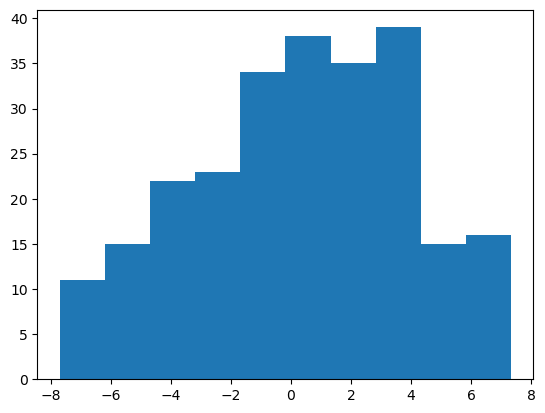

In [9]:
plt.hist(test['ground_slope'])

(array([ 16.,  66., 146., 157., 167., 209., 173., 148., 120.,  58.]),
 array([-8.59229564, -6.93024209, -5.26818853, -3.60613498, -1.94408143,
        -0.28202787,  1.38002568,  3.04207923,  4.70413279,  6.36618634,
         8.02823989]),
 <BarContainer object of 10 artists>)

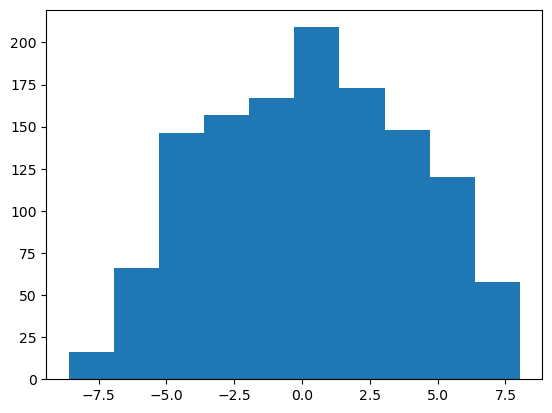

In [8]:
plt.hist(test2['ground_slope'])